<a href="https://colab.research.google.com/github/ZackBoner/SLGM-fall-2021/blob/main/2021F_Lab_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this Lab is to help you understand how MLE works in practice, and what elements will influence the estimation empirically (e.g., number of samples).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
import scipy as sp
import scipy.stats as st
from IPython.display import Latex,display,Math
import pandas as pd
print("Modules Imported!")

Modules Imported!


# Properties of MLE

__Task:__ Write a function that, given samples drawn from $\mathcal{N}(\mu,\sigma^2)$, returns the maximum likelihood estimates of $\mu$ and $\sigma^2$.

In [7]:
def NormML(y): # y is a one dimensional array containing the samples
    # Begin Solution
    n = len(y)
    u_ml = (1/n)*sum(y)
    var_ml = (1/n)*sum((y_i - u_ml)**2 for y_i in y)
    
    return u_ml, var_ml
    # End Solution

## Bias, Variance, and MSE

__Task:__ Generate 10000 batches of $\mathcal{N}(3,4)$ samples, each containing 10 samples. Using the function NormML above, compute the ML estimates for $\mu$ and  $\sigma^2$ for each batch (so you will have 10,000 estimates of the same $\mu$ and $\sigma^2$). Find the empirical bias, variance, and MSE (based on simulation) for the ML estimates of both $\mu$ and $\sigma^2$ and compare these with the corresponding theoretical values. [Hint: The variance of $\hat\sigma^2_{ML}$ is $\frac{n-1}{n}\frac{2\sigma^4}{n}$]



In [89]:
theta0 = [3,4] #[mean,variance]
mynorm = st.norm(theta0[0],np.sqrt(theta0[1]))
N = 10000 # number of batches
n = 10 # samples per batch
y = mynorm.rvs([N,n])

# Begin Solution
ml_estimates = [NormML(batch_y) for batch_y in y]
mu_estimates = [x[0] for x in ml_estimates]
var_estimates = [x[1] for x in ml_estimates]

# average estimates of mean and variance
avg_est_u = np.mean(mu_estimates)
avg_est_var = np.mean(var_estimates)

# empirical bias, variance, and mse of mean
emp_bias_u = avg_est_u - theta0[0]
emp_var_u = np.var(mu_estimates)
emp_mse_u = emp_var_u + emp_bias_u**2

# empirical bias, variance, and mse of variance
emp_bias_var = avg_est_var - theta0[1]
emp_var_var = np.var(var_estimates)
emp_mse_var = emp_var_var + emp_bias_var**2

# theoretical bias, variance, and mse of mean
the_bias_u = 0
the_var_u = theta0[1]/n
the_mse_u = the_var_u + the_bias_u**2

#theoretical bias, variance, and mse of variance
the_bias_var = -theta0[1]/n
the_var_var = (n-1) / n * 2 * theta0[1]**2 / n
the_mse_var = the_var_var + the_bias_var**2

print(f"True mu: {theta0[0]}, average estimate: {avg_est_u}, empirical bias: {emp_bias_u}, theoretical bias: {the_bias_u}")
print(f"True sigma2: {theta0[1]}, average estimate: {avg_est_var}, empirical bias: {emp_bias_var}, theoretical bias: {the_bias_var}")
print(f"Empirical variance of the mu_hat: {emp_var_u}, theoretical variance: {the_var_u}")
print(f"Empirical variance of the sigma2_hat: {emp_var_var}, theoretical variance: {the_var_var}")
print(f"Empirical MSE of the mu_hat: {emp_mse_u}, theoretical MSE: {the_mse_u}")
print(f"Empirical MSE of the sigma2_hat: {emp_mse_var}, theoretical MSE: {the_mse_var}")
# End Solution

True mu: 3, average estimate: 2.9934361197788406, empirical bias: -0.0065638802211593905, theoretical bias: 0
True sigma2: 4, average estimate: 3.5806136153454413, empirical bias: -0.4193863846545587, theoretical bias: -0.4
Empirical variance of the mu_hat: 0.406072839362378, theoretical variance: 0.4
Empirical variance of the sigma2_hat: 2.8652691648368176, theoretical variance: 2.88
Empirical MSE of the mu_hat: 0.4061159238859357, theoretical MSE: 0.4
Empirical MSE of the sigma2_hat: 3.041154104470439, theoretical MSE: 3.04


### Consistentcy
Intuitively, an estimator is consistent if it gives us the correct solution when we have lots of data. 

___
__Task:__ Generate a vector $y$ consisting of $N$ normal samples drawn from $\mathcal{N}(\mu_0,\sigma_0^2)$ for $\mu_0=3$, $\sigma_0^2=4$ and a large value of $N$, say $N=500$. Then compute the estimates for $\mu_0$ and $\sigma^2_0$ using the first $n$ sample (that is `y[0:n]`) as $n$ ranges from 10 to $N$, choosing an appropriate step size. Plot the result and discuss it in the context of consistency. Does ML appear to be consistent?

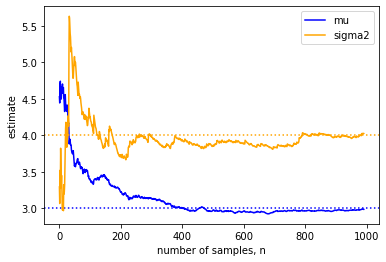

In [130]:
theta0 = [3,4] #[mean,variance]
# Begin Solution
mynorm = st.norm(theta0[0],np.sqrt(theta0[1]))
N = 1000 # number of samples
y = mynorm.rvs(N)

ml_estimates_varying_n = [NormML(y[0:n]) for n in range(10, N+1)]
mu_estimates = [x[0] for x in ml_estimates_varying_n]
var_estimates = [x[1] for x in ml_estimates_varying_n]

plt.figure()
plt.plot(mu_estimates, c='blue', label='mu')
plt.axhline(theta0[0], c='blue', linestyle='dotted')
plt.plot(var_estimates, c='orange', label='sigma2')
plt.axhline(theta0[1], c='orange', linestyle='dotted')
plt.xlabel('number of samples, n')
plt.ylabel('estimate')
plt.legend()
plt.show()

# End Solution

The ML for both mu and sigma2 seem to be consistent. As the number of samples considered increases, both estimates appear to be getting closer and closer to their true value. Since this is the case, it appears as if, for all $\epsilon > 0$, $\lim_{n\rightarrow \infty} Pr(|\hat{\theta_n}-\theta| \geq \epsilon)=0$

_____
## Asymptotic Normality
From the asymptotic normality of the ML estimator we have
$$\sqrt{n}(\hat\mu_{ML}-\mu)\to N(0,I^{-1}(\mu))$$
where $I$ is the Fisher information and in this case equals $I(\mu)=\frac{1}{\sigma^2}$.

And for $\sigma^2$,
$$\sqrt{n}({\hat\sigma^2}_{ML}-\sigma^2)\to N(0,I^{-1}(\sigma^2)),$$
where $I(\sigma^2)=1/(2\sigma^4)$. 

__Task:__ Using the batches and estimates from the Bias, Variance and MSE section above, plot the histograms for the estimates (multiplied by $\sqrt{n}$ as above) and compare them with the limit distribution given on the right side of the above expressions. Are the approximations by the limit distributions accurate to the same degree for both mean and the variance? If not, why do you think that is the case? (You can try with batches with more samples and verify that for large batches, they become increasingly better approximations).

<Figure size 432x288 with 0 Axes>

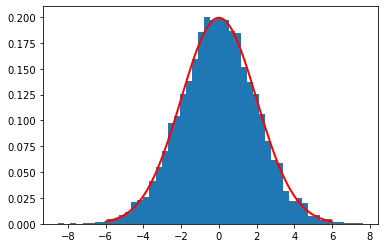

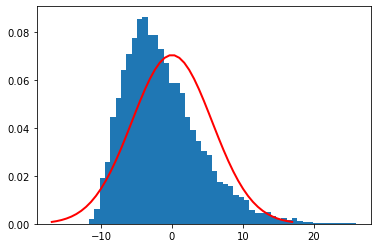

<Figure size 432x288 with 0 Axes>

In [148]:
theta0 = [3,4] #[mean,variance]
mynorm = st.norm(theta0[0],np.sqrt(theta0[1]))
N = 10000 # number of batches
n = 10 # samples per batch
y = mynorm.rvs([N,n])

# Begin Solution
ml_estimates = [NormML(batch_y) for batch_y in y]
mu_estimates = [x[0] for x in ml_estimates]
var_estimates = [x[1] for x in ml_estimates]

# histogram for the distribution of estimate of the mean
plt.hist([(m-theta0[0])*np.sqrt(n) for m in mu_estimates],50,density=True); #can use either 'normed=True' or 'density=True' since 'normed' will  be deprecated better to use 'density'
r = np.linspace(-3*np.sqrt(theta0[1]),3*np.sqrt(theta0[1]),100);
plt.plot(r,st.norm.pdf(r,0,np.sqrt(theta0[1])),'r',linewidth=2); # we use sqrt since python requires std rather than var
plt.figure()

# histogram for the distribution of estimate of the variance
# Begin Solution
plt.hist([(v-theta0[1])*np.sqrt(n) for v in var_estimates],50,density=True); #can use either 'normed=True' or 'density=True' since 'normed' will  be deprecated better to use 'density'
r = np.linspace(-3*np.sqrt(2*theta0[1]**2),3*np.sqrt(2*theta0[1]**2));
plt.plot(r,st.norm.pdf(r,0,np.sqrt(2*theta0[1]**2)),'r',linewidth=2); # we use sqrt since python requires std rather than var
plt.figure()
# End Solution

The maximum likelihood estimate for the variance is biased, and for small samples this bias is clearly visible. This bias term, however, becomes increasingly negligible as n grows, so the effect of bias on the approximations will decrease if the number of samples in each batch is increased.

## Multivariate Normal Estimation

Consider the dataset $\{x_1,\dotsc,x_N\}$, where each $x_i$ is a vector of size $m$. Assuming this data is multivariate normal, i.e., $x_i\sim \mathcal N(\mu,K)$, we would like to find estimate $\mu$ and $K$ using maximum likelihood.
___
__Task:__ Write a module for estimating $\mu$ and $K$. Assume that the input is a $N\times m$ array $X$, where each row $x_i$ of $X$ is an $m$-dimensional data sample, with distribution $x_i\sim \mathcal N(\mu,K)$.

In [194]:
def MultiVarNormML(X): # Each row of X is one sample x_i and each column corresponds to a dimension/feauter
    # Begin Solution
    u_ml = np.mean(X, axis=0)
    K_ml = np.mean([np.outer(z_i-u_ml, z_i-u_ml) for z_i in X], axis=0)
    return u_ml, K_ml
    # End Solution

We will use this estimator to explore relationships from a [dataset](http://archive.ics.uci.edu/ml/datasets/student+performance) about math performance for a group of students. The data is at the end of the notebook and needs to be loaded. **Make sure you run the last cell of this notebook before continueing.** After reading the data, we normalize the columns that we care about to have variance equal to 1. These columns/features are:
0. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
1. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
2. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
3. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
4. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
5. G3 - final grade (numeric: from 0 to 20, output target)

In [161]:
# Execute the last cell of the notebook before this cell!
T=pd.read_csv(data_csv,delimiter=';')
dims = ['studytime','goout','failures','Medu','Fedu','G3']
for s in dims:
    T[s] = T[s]/np.std(T[s])
X = T[dims].values

__Task:__ Find the ML estimate of $K$ for this data and discuss a couple of relationships that you observe. In particular, what appears to be more strongly correlated with final grade: mother's or father's education? [Hint: Use the module you created in prior task to attain the estimates and print out $\hat K$ and also plot it using the matshow function from matplotlib]

Correlation matrix:
[[ 1.         -0.06390368 -0.17356303  0.06494414 -0.00917464  0.09781969]
 [-0.06390368  1.          0.12456092  0.06409444  0.04310467 -0.13279147]
 [-0.17356303  0.12456092  1.         -0.23667996 -0.25040844 -0.36041494]
 [ 0.06494414  0.06409444 -0.23667996  1.          0.62345511  0.2171475 ]
 [-0.00917464  0.04310467 -0.25040844  0.62345511  1.          0.15245694]
 [ 0.09781969 -0.13279147 -0.36041494  0.2171475   0.15245694  1.        ]]



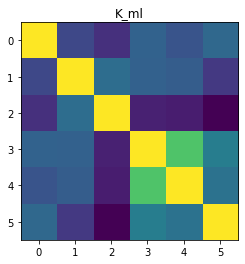

Columns: {0: 'studytime', 1: 'goout', 2: 'failures', 3: 'Medu', 4: 'Fedu', 5: 'G3'}


In [211]:
# Begin Solution
u_ml, K_ml = MultiVarNormML(X)

print(f"Correlation matrix:\n{K_ml}\n")

plt.figure()
plt.imshow(K_ml)
plt.title("K_ml")
plt.show()

print("Columns:",{i: dims[i] for i in range(len(dims))})
# End Solution

Mother's education and father's education are strongly correlated, demonstrating that people of similar educational status seem to be married. 
Also, failures are unsurprisingly negatively correlated with final grade. 
Going out is weakly negatively correlated with final grade.
An interesting relationship, or lack thereof, is that study time is not strongly related to any of the other variables, including final grade.
Mother's education appears to be slightly stronger correlated with final grade than father's education, at correlation levels of 0.21 and 0.15, respectively.

## Data for Multivariate Normal Estimation


In [160]:
# data for multivariate normal
data_csv = StringIO('''school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6
"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6
"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10
"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15
"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";10
"GP";"M";16;"U";"LE3";"T";4;3;"services";"other";"reputation";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;4;2;1;2;5;10;"15";"15";15
"GP";"M";16;"U";"LE3";"T";2;2;"other";"other";"home";"mother";1;2;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;4;4;1;1;3;0;"12";"12";11
"GP";"F";17;"U";"GT3";"A";4;4;"other";"teacher";"home";"mother";2;2;0;"yes";"yes";"no";"no";"yes";"yes";"no";"no";4;1;4;1;1;1;6;"6";"5";6
"GP";"M";15;"U";"LE3";"A";3;2;"services";"other";"home";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;2;2;1;1;1;0;"16";"18";19
"GP";"M";15;"U";"GT3";"T";3;4;"other";"other";"home";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;5;1;1;1;5;0;"14";"15";15
"GP";"F";15;"U";"GT3";"T";4;4;"teacher";"health";"reputation";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";3;3;3;1;2;2;0;"10";"8";9
"GP";"F";15;"U";"GT3";"T";2;1;"services";"other";"reputation";"father";3;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;2;2;1;1;4;4;"10";"12";12
"GP";"M";15;"U";"LE3";"T";4;4;"health";"services";"course";"father";1;1;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;3;1;3;5;2;"14";"14";14
"GP";"M";15;"U";"GT3";"T";4;3;"teacher";"other";"course";"mother";2;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";5;4;3;1;2;3;2;"10";"10";11
"GP";"M";15;"U";"GT3";"A";2;2;"other";"other";"home";"other";1;3;0;"no";"yes";"no";"no";"yes";"yes";"yes";"yes";4;5;2;1;1;3;0;"14";"16";16
"GP";"F";16;"U";"GT3";"T";4;4;"health";"other";"home";"mother";1;1;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";4;4;4;1;2;2;4;"14";"14";14
"GP";"F";16;"U";"GT3";"T";4;4;"services";"services";"reputation";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";3;2;3;1;2;2;6;"13";"14";14
"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"reputation";"mother";3;2;0;"yes";"yes";"no";"yes";"yes";"yes";"no";"no";5;3;2;1;1;4;4;"8";"10";10
"GP";"M";17;"U";"GT3";"T";3;2;"services";"services";"course";"mother";1;1;3;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;5;5;2;4;5;16;"6";"5";5
"GP";"M";16;"U";"LE3";"T";4;3;"health";"other";"home";"father";1;1;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";3;1;3;1;3;5;4;"8";"10";10
"GP";"M";15;"U";"GT3";"T";4;3;"teacher";"other";"reputation";"mother";1;2;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;4;1;1;1;1;0;"13";"14";15
"GP";"M";15;"U";"GT3";"T";4;4;"health";"health";"other";"father";1;1;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";5;4;2;1;1;5;0;"12";"15";15
"GP";"M";16;"U";"LE3";"T";4;2;"teacher";"other";"course";"mother";1;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";4;5;1;1;3;5;2;"15";"15";16
"GP";"M";16;"U";"LE3";"T";2;2;"other";"other";"reputation";"mother";2;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;4;4;2;4;5;0;"13";"13";12
"GP";"F";15;"R";"GT3";"T";2;4;"services";"health";"course";"mother";1;3;0;"yes";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;2;1;1;5;2;"10";"9";8
"GP";"F";16;"U";"GT3";"T";2;2;"services";"services";"home";"mother";1;1;2;"no";"yes";"yes";"no";"no";"yes";"yes";"no";1;2;2;1;3;5;14;"6";"9";8
"GP";"M";15;"U";"GT3";"T";2;2;"other";"other";"home";"mother";1;1;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;2;2;1;2;5;2;"12";"12";11
"GP";"M";15;"U";"GT3";"T";4;2;"health";"services";"other";"mother";1;1;0;"no";"no";"yes";"no";"yes";"yes";"yes";"no";2;2;4;2;4;1;4;"15";"16";15
"GP";"M";16;"U";"LE3";"A";3;4;"services";"other";"home";"mother";1;2;0;"yes";"yes";"no";"yes";"yes";"yes";"yes";"no";5;3;3;1;1;5;4;"11";"11";11
"GP";"M";16;"U";"GT3";"T";4;4;"teacher";"teacher";"home";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;4;5;5;5;5;16;"10";"12";11
"GP";"M";15;"U";"GT3";"T";4;4;"health";"services";"home";"mother";1;2;0;"no";"yes";"yes";"no";"no";"yes";"yes";"no";5;4;2;3;4;5;0;"9";"11";12
"GP";"M";15;"U";"GT3";"T";4;4;"services";"services";"reputation";"mother";2;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;3;1;1;1;5;0;"17";"16";17
"GP";"M";15;"R";"GT3";"T";4;3;"teacher";"at_home";"course";"mother";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";4;5;2;1;1;5;0;"17";"16";16
"GP";"M";15;"U";"LE3";"T";3;3;"other";"other";"course";"mother";1;2;0;"no";"no";"no";"yes";"no";"yes";"yes";"no";5;3;2;1;1;2;0;"8";"10";12
"GP";"M";16;"U";"GT3";"T";3;2;"other";"other";"home";"mother";1;1;0;"no";"yes";"yes";"no";"no";"yes";"yes";"no";5;4;3;1;1;5;0;"12";"14";15
"GP";"F";15;"U";"GT3";"T";2;3;"other";"other";"other";"father";2;1;0;"no";"yes";"no";"yes";"yes";"yes";"no";"no";3;5;1;1;1;5;0;"8";"7";6
"GP";"M";15;"U";"LE3";"T";4;3;"teacher";"services";"home";"mother";1;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;4;3;1;1;4;2;"15";"16";18
"GP";"M";16;"R";"GT3";"A";4;4;"other";"teacher";"reputation";"mother";2;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";2;4;3;1;1;5;7;"15";"16";15
"GP";"F";15;"R";"GT3";"T";3;4;"services";"health";"course";"mother";1;3;0;"yes";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;2;1;1;5;2;"12";"12";11
"GP";"F";15;"R";"GT3";"T";2;2;"at_home";"other";"reputation";"mother";1;1;0;"yes";"yes";"yes";"yes";"yes";"yes";"no";"no";4;3;1;1;1;2;8;"14";"13";13
"GP";"F";16;"U";"LE3";"T";2;2;"other";"other";"home";"mother";2;2;1;"no";"yes";"no";"yes";"no";"yes";"yes";"yes";3;3;3;1;2;3;25;"7";"10";11
"GP";"M";15;"U";"LE3";"T";4;4;"teacher";"other";"home";"other";1;1;0;"no";"yes";"no";"no";"no";"yes";"yes";"yes";5;4;3;2;4;5;8;"12";"12";12
"GP";"M";15;"U";"GT3";"T";4;4;"services";"teacher";"course";"father";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;3;3;1;1;5;2;"19";"18";18
"GP";"M";15;"U";"GT3";"T";2;2;"services";"services";"course";"father";1;1;0;"yes";"yes";"no";"no";"yes";"yes";"yes";"no";5;4;1;1;1;1;0;"8";"8";11
"GP";"F";16;"U";"LE3";"T";2;2;"other";"at_home";"course";"father";2;2;1;"yes";"no";"no";"yes";"yes";"yes";"yes";"no";4;3;3;2;2;5;14;"10";"10";9
"GP";"F";15;"U";"LE3";"A";4;3;"other";"other";"course";"mother";1;2;0;"yes";"yes";"yes";"yes";"yes";"yes";"yes";"yes";5;2;2;1;1;5;8;"8";"8";6
"GP";"F";16;"U";"LE3";"A";3;3;"other";"services";"home";"mother";1;2;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";2;3;5;1;4;3;12;"11";"12";11
"GP";"M";16;"U";"GT3";"T";4;3;"health";"services";"reputation";"mother";1;4;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";4;2;2;1;1;2;4;"19";"19";20
"GP";"M";15;"U";"GT3";"T";4;2;"teacher";"other";"home";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;3;2;2;5;2;"15";"15";14
"GP";"F";15;"U";"GT3";"T";4;4;"services";"teacher";"other";"father";1;2;1;"yes";"yes";"no";"yes";"no";"yes";"yes";"no";4;4;4;1;1;3;2;"7";"7";7
"GP";"F";16;"U";"LE3";"T";2;2;"services";"services";"course";"mother";3;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;3;2;3;4;2;"12";"13";13
"GP";"F";15;"U";"LE3";"T";4;2;"health";"other";"other";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;3;1;1;5;2;"11";"13";13
"GP";"M";15;"U";"LE3";"A";4;2;"health";"health";"other";"father";2;1;1;"no";"no";"no";"no";"yes";"yes";"no";"no";5;5;5;3;4;5;6;"11";"11";10
"GP";"F";15;"U";"GT3";"T";4;4;"services";"services";"course";"mother";1;1;0;"yes";"yes";"yes";"no";"yes";"yes";"yes";"no";3;3;4;2;3;5;0;"8";"10";11
"GP";"F";15;"U";"LE3";"A";3;3;"other";"other";"other";"mother";1;1;0;"no";"no";"yes";"no";"yes";"yes";"yes";"no";5;3;4;4;4;1;6;"10";"13";13
"GP";"F";16;"U";"GT3";"A";2;1;"other";"other";"other";"mother";1;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"yes";5;3;4;1;1;2;8;"8";"9";10
"GP";"F";15;"U";"GT3";"A";4;3;"services";"services";"reputation";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;2;1;1;1;0;"14";"15";15
"GP";"M";15;"U";"GT3";"T";4;4;"teacher";"health";"reputation";"mother";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"no";"no";3;2;2;1;1;5;4;"14";"15";15
"GP";"M";15;"U";"LE3";"T";1;2;"other";"at_home";"home";"father";1;2;0;"yes";"yes";"no";"yes";"yes";"yes";"yes";"no";4;3;2;1;1;5;2;"9";"10";9
"GP";"F";16;"U";"GT3";"T";4;2;"services";"other";"course";"mother";1;2;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";4;2;3;1;1;5;2;"15";"16";16
"GP";"F";16;"R";"GT3";"T";4;4;"health";"teacher";"other";"mother";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"no";"no";2;4;4;2;3;4;6;"10";"11";11
"GP";"F";16;"U";"GT3";"T";1;1;"services";"services";"course";"father";4;1;0;"yes";"yes";"no";"yes";"no";"yes";"yes";"yes";5;5;5;5;5;5;6;"10";"8";11
"GP";"F";16;"U";"LE3";"T";1;2;"other";"services";"reputation";"father";1;2;0;"yes";"no";"no";"yes";"yes";"yes";"yes";"no";4;4;3;1;1;1;4;"8";"10";9
"GP";"F";16;"U";"GT3";"T";4;3;"teacher";"health";"home";"mother";1;3;0;"yes";"yes";"yes";"yes";"yes";"yes";"yes";"no";3;4;4;2;4;4;2;"10";"9";9
"GP";"F";15;"U";"LE3";"T";4;3;"services";"services";"reputation";"father";1;2;0;"yes";"no";"no";"yes";"yes";"yes";"yes";"yes";4;4;4;2;4;2;0;"10";"10";10
"GP";"F";16;"U";"LE3";"T";4;3;"teacher";"services";"course";"mother";3;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;4;3;1;2;1;2;"16";"15";15
"GP";"M";15;"U";"GT3";"A";4;4;"other";"services";"reputation";"mother";1;4;0;"no";"yes";"no";"yes";"no";"yes";"yes";"yes";1;3;3;5;5;3;4;"13";"13";12
"GP";"F";16;"U";"GT3";"T";3;1;"services";"other";"course";"mother";1;4;0;"yes";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;3;1;2;5;4;"7";"7";6
"GP";"F";15;"R";"LE3";"T";2;2;"health";"services";"reputation";"mother";2;2;0;"yes";"yes";"yes";"no";"yes";"yes";"yes";"no";4;1;3;1;3;4;2;"8";"9";8
"GP";"F";15;"R";"LE3";"T";3;1;"other";"other";"reputation";"father";2;4;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";4;4;2;2;3;3;12;"16";"16";16
"GP";"M";16;"U";"GT3";"T";3;1;"other";"other";"reputation";"father";2;4;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;2;1;1;5;0;"13";"15";15
"GP";"M";15;"U";"GT3";"T";4;2;"other";"other";"course";"mother";1;4;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";3;3;3;1;1;3;0;"10";"10";10
"GP";"F";15;"R";"GT3";"T";1;1;"other";"other";"reputation";"mother";1;2;2;"yes";"yes";"no";"no";"no";"yes";"yes";"yes";3;3;4;2;4;5;2;"8";"6";5
"GP";"M";16;"U";"GT3";"T";3;1;"other";"other";"reputation";"mother";1;1;0;"no";"no";"no";"yes";"yes";"yes";"no";"no";5;3;2;2;2;5;2;"12";"12";14
"GP";"F";16;"U";"GT3";"T";3;3;"other";"services";"home";"mother";1;2;0;"yes";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;3;2;4;5;54;"11";"12";11
"GP";"M";15;"U";"GT3";"T";4;3;"teacher";"other";"home";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;3;2;3;5;6;"9";"9";10
"GP";"M";15;"U";"GT3";"T";4;0;"teacher";"other";"course";"mother";2;4;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";3;4;3;1;1;1;8;"11";"11";10
"GP";"F";16;"U";"GT3";"T";2;2;"other";"other";"reputation";"mother";1;4;0;"no";"no";"yes";"no";"yes";"yes";"yes";"yes";5;2;3;1;3;3;0;"11";"11";11
"GP";"M";17;"U";"GT3";"T";2;1;"other";"other";"home";"mother";2;1;3;"yes";"yes";"no";"yes";"yes";"no";"yes";"no";4;5;1;1;1;3;2;"8";"8";10
"GP";"F";16;"U";"GT3";"T";3;4;"at_home";"other";"course";"mother";1;2;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";2;4;3;1;2;3;12;"5";"5";5
"GP";"M";15;"U";"GT3";"T";2;3;"other";"services";"course";"father";1;1;0;"yes";"yes";"yes";"yes";"no";"yes";"yes";"yes";3;2;2;1;3;3;2;"10";"12";12
"GP";"M";15;"U";"GT3";"T";2;3;"other";"other";"home";"mother";1;3;0;"yes";"no";"yes";"no";"no";"yes";"yes";"no";5;3;2;1;2;5;4;"11";"10";11
"GP";"F";15;"U";"LE3";"T";3;2;"services";"other";"reputation";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;4;4;1;1;5;10;"7";"6";6
"GP";"M";15;"U";"LE3";"T";2;2;"services";"services";"home";"mother";2;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";5;3;3;1;3;4;4;"15";"15";15
"GP";"F";15;"U";"GT3";"T";1;1;"other";"other";"home";"father";1;2;0;"no";"yes";"no";"yes";"no";"yes";"yes";"no";4;3;2;2;3;4;2;"9";"10";10
"GP";"F";15;"U";"GT3";"T";4;4;"services";"services";"reputation";"father";2;2;2;"no";"no";"yes";"no";"yes";"yes";"yes";"yes";4;4;4;2;3;5;6;"7";"9";8
"GP";"F";16;"U";"LE3";"T";2;2;"at_home";"other";"course";"mother";1;2;0;"no";"yes";"no";"no";"yes";"yes";"no";"no";4;3;4;1;2;2;4;"8";"7";6
"GP";"F";15;"U";"GT3";"T";4;2;"other";"other";"reputation";"mother";1;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;3;3;1;3;1;4;"13";"14";14
"GP";"M";16;"U";"GT3";"T";2;2;"services";"other";"reputation";"father";2;2;1;"no";"no";"yes";"yes";"no";"yes";"yes";"no";4;4;2;1;1;3;12;"11";"10";10
"GP";"M";16;"U";"LE3";"A";4;4;"teacher";"health";"reputation";"mother";1;2;0;"no";"yes";"no";"no";"yes";"yes";"no";"no";4;1;3;3;5;5;18;"8";"6";7
"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"mother";1;3;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;3;3;1;3;4;0;"7";"7";8
"GP";"F";15;"U";"GT3";"T";4;3;"services";"other";"reputation";"mother";1;1;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";4;5;5;1;3;1;4;"16";"17";18
"GP";"F";16;"U";"LE3";"T";3;1;"other";"other";"home";"father";1;2;0;"yes";"yes";"no";"no";"yes";"yes";"no";"no";3;3;3;2;3;2;4;"7";"6";6
"GP";"F";16;"U";"GT3";"T";4;2;"teacher";"services";"home";"mother";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;3;3;1;1;1;0;"11";"10";10
"GP";"M";15;"U";"LE3";"T";2;2;"services";"health";"reputation";"mother";1;4;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;3;4;1;1;4;6;"11";"13";14
"GP";"F";15;"R";"GT3";"T";1;1;"at_home";"other";"home";"mother";2;4;1;"yes";"yes";"yes";"yes";"yes";"yes";"yes";"no";3;1;2;1;1;1;2;"7";"10";10
"GP";"M";16;"R";"GT3";"T";4;3;"services";"other";"reputation";"mother";2;1;0;"yes";"yes";"no";"yes";"no";"yes";"yes";"no";3;3;3;1;1;4;2;"11";"15";15
"GP";"F";16;"U";"GT3";"T";2;1;"other";"other";"course";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"yes";4;3;5;1;1;5;2;"8";"9";10
"GP";"F";16;"U";"GT3";"T";4;4;"other";"other";"reputation";"mother";1;1;0;"no";"no";"no";"yes";"no";"yes";"yes";"no";5;3;4;1;2;1;6;"11";"14";14
"GP";"F";16;"U";"GT3";"T";4;3;"other";"at_home";"course";"mother";1;3;0;"yes";"yes";"yes";"no";"yes";"yes";"yes";"no";5;3;5;1;1;3;0;"7";"9";8
"GP";"M";16;"U";"GT3";"T";4;4;"services";"services";"other";"mother";1;1;0;"yes";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;5;5;5;5;4;14;"7";"7";5
"GP";"M";16;"U";"GT3";"T";4;4;"services";"teacher";"other";"father";1;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";4;4;3;1;1;4;0;"16";"17";17
"GP";"M";15;"U";"GT3";"T";4;4;"services";"other";"course";"mother";1;1;0;"no";"yes";"no";"yes";"no";"yes";"yes";"no";5;3;3;1;1;5;4;"10";"13";14
"GP";"F";15;"U";"GT3";"T";3;2;"services";"other";"home";"mother";2;2;0;"yes";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;5;1;1;2;26;"7";"6";6
"GP";"M";15;"U";"GT3";"A";3;4;"services";"other";"course";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;4;4;1;1;1;0;"16";"18";18
"GP";"F";15;"U";"GT3";"A";3;3;"other";"health";"reputation";"father";1;4;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;3;1;1;4;10;"10";"11";11
"GP";"F";15;"U";"GT3";"T";2;2;"other";"other";"course";"mother";1;4;0;"yes";"yes";"yes";"no";"yes";"yes";"yes";"no";5;1;2;1;1;3;8;"7";"8";8
"GP";"M";16;"U";"GT3";"T";3;3;"services";"other";"home";"father";1;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;3;3;1;1;5;2;"16";"18";18
"GP";"M";15;"R";"GT3";"T";4;4;"other";"other";"home";"father";4;4;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";1;3;5;3;5;1;6;"10";"13";13
"GP";"F";16;"U";"LE3";"T";4;4;"health";"health";"other";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";5;4;5;1;1;4;4;"14";"15";16
"GP";"M";15;"U";"LE3";"A";4;4;"teacher";"teacher";"course";"mother";1;1;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";5;5;3;1;1;4;6;"18";"19";19
"GP";"F";16;"R";"GT3";"T";3;3;"services";"other";"reputation";"father";1;3;1;"yes";"yes";"no";"yes";"yes";"yes";"yes";"no";4;1;2;1;1;2;0;"7";"10";10
"GP";"F";16;"U";"GT3";"T";2;2;"at_home";"other";"home";"mother";1;2;1;"yes";"no";"no";"yes";"yes";"yes";"yes";"no";3;1;2;1;1;5;6;"10";"13";13
"GP";"M";15;"U";"LE3";"T";4;2;"teacher";"other";"course";"mother";1;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";3;5;2;1;1;3;10;"18";"19";19
"GP";"M";15;"R";"GT3";"T";2;1;"health";"services";"reputation";"mother";1;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"yes";5;4;2;1;1;5;8;"9";"9";9
"GP";"M";16;"U";"GT3";"T";4;4;"teacher";"teacher";"course";"father";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;4;4;1;2;5;2;"15";"15";16
"GP";"M";15;"U";"GT3";"T";4;4;"other";"teacher";"reputation";"father";2;2;0;"no";"yes";"no";"yes";"yes";"yes";"no";"no";4;4;3;1;1;2;2;"11";"13";14
"GP";"M";16;"U";"GT3";"T";3;3;"other";"services";"home";"father";2;1;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";5;4;2;1;1;5;0;"13";"14";13
"GP";"M";17;"R";"GT3";"T";1;3;"other";"other";"course";"father";3;2;1;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";5;2;4;1;4;5;20;"9";"7";8
"GP";"M";15;"U";"GT3";"T";3;4;"other";"other";"reputation";"father";1;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";3;4;3;1;2;4;6;"14";"13";13
"GP";"F";15;"U";"GT3";"T";1;2;"at_home";"services";"course";"mother";1;2;0;"no";"no";"no";"no";"no";"yes";"yes";"no";3;2;3;1;2;1;2;"16";"15";15
"GP";"M";15;"U";"GT3";"T";2;2;"services";"services";"home";"father";1;4;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;5;4;1;2;5;6;"16";"14";15
"GP";"F";16;"U";"LE3";"T";2;4;"other";"health";"course";"father";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;2;2;1;2;5;2;"13";"13";13
"GP";"M";16;"U";"GT3";"T";4;4;"health";"other";"course";"mother";1;1;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";3;4;4;1;4;5;18;"14";"11";13
"GP";"F";16;"U";"GT3";"T";2;2;"other";"other";"home";"mother";1;2;0;"no";"no";"yes";"no";"yes";"yes";"yes";"yes";5;4;4;1;1;5;0;"8";"7";8
"GP";"M";15;"U";"GT3";"T";3;4;"services";"services";"home";"father";1;1;0;"yes";"no";"no";"no";"yes";"yes";"yes";"no";5;5;5;3;2;5;0;"13";"13";12
"GP";"F";15;"U";"LE3";"A";3;4;"other";"other";"home";"mother";1;2;0;"yes";"no";"no";"yes";"yes";"yes";"yes";"yes";5;3;2;1;1;1;0;"7";"10";11
"GP";"F";19;"U";"GT3";"T";0;1;"at_home";"other";"course";"other";1;2;3;"no";"yes";"no";"no";"no";"no";"no";"no";3;4;2;1;1;5;2;"7";"8";9
"GP";"M";18;"R";"GT3";"T";2;2;"services";"other";"reputation";"mother";1;1;2;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";3;3;3;1;2;4;0;"7";"4";0
"GP";"M";16;"R";"GT3";"T";4;4;"teacher";"teacher";"course";"mother";1;1;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";3;5;5;2;5;4;8;"18";"18";18
"GP";"F";15;"R";"GT3";"T";3;4;"services";"teacher";"course";"father";2;3;2;"no";"yes";"no";"no";"yes";"yes";"yes";"yes";4;2;2;2;2;5;0;"12";"0";0
"GP";"F";15;"U";"GT3";"T";1;1;"at_home";"other";"course";"mother";3;1;0;"no";"yes";"no";"yes";"no";"yes";"yes";"yes";4;3;3;1;2;4;0;"8";"0";0
"GP";"F";17;"U";"LE3";"T";2;2;"other";"other";"course";"father";1;1;0;"no";"yes";"no";"no";"yes";"yes";"yes";"yes";3;4;4;1;3;5;12;"10";"13";12
"GP";"F";16;"U";"GT3";"A";3;4;"services";"other";"course";"father";1;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";3;2;1;1;4;5;16;"12";"11";11
"GP";"M";15;"R";"GT3";"T";3;4;"at_home";"teacher";"course";"mother";4;2;0;"no";"yes";"no";"no";"yes";"yes";"no";"yes";5;3;3;1;1;5;0;"9";"0";0
"GP";"F";15;"U";"GT3";"T";4;4;"services";"at_home";"course";"mother";1;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";4;3;3;1;1;5;0;"11";"0";0
"GP";"M";17;"R";"GT3";"T";3;4;"at_home";"other";"course";"mother";3;2;0;"no";"no";"no";"no";"yes";"yes";"no";"no";5;4;5;2;4;5;0;"10";"0";0
"GP";"F";16;"U";"GT3";"A";3;3;"other";"other";"course";"other";2;1;2;"no";"yes";"no";"yes";"no";"yes";"yes";"yes";4;3;2;1;1;5;0;"4";"0";0
"GP";"M";16;"U";"LE3";"T";1;1;"services";"other";"course";"mother";1;2;1;"no";"no";"no";"no";"yes";"yes";"no";"yes";4;4;4;1;3;5;0;"14";"12";12
"GP";"F";15;"U";"GT3";"T";4;4;"teacher";"teacher";"course";"mother";2;1;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";4;3;2;1;1;5;0;"16";"16";15
"GP";"M";15;"U";"GT3";"T";4;3;"teacher";"services";"course";"father";2;4;0;"yes";"yes";"no";"no";"yes";"yes";"yes";"no";2;2;2;1;1;3;0;"7";"9";0
"GP";"M";16;"U";"LE3";"T";2;2;"services";"services";"reputation";"father";2;1;2;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";2;3;3;2;2;2;8;"9";"9";9
"GP";"F";15;"U";"GT3";"T";4;4;"teacher";"services";"course";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;2;2;1;1;5;2;"9";"11";11
"GP";"F";16;"U";"LE3";"T";1;1;"at_home";"at_home";"course";"mother";1;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";3;4;4;3;3;1;2;"14";"14";13
"GP";"M";17;"U";"GT3";"T";2;1;"other";"other";"home";"mother";1;1;3;"no";"yes";"no";"no";"yes";"yes";"yes";"no";5;4;5;1;2;5;0;"5";"0";0
"GP";"F";15;"U";"GT3";"T";1;1;"other";"services";"course";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;4;2;1;2;5;0;"8";"11";11
"GP";"F";15;"U";"GT3";"T";3;2;"health";"services";"home";"father";1;2;3;"no";"yes";"no";"no";"yes";"yes";"yes";"no";3;3;2;1;1;3;0;"6";"7";0
"GP";"F";15;"U";"GT3";"T";1;2;"at_home";"other";"course";"mother";1;2;0;"no";"yes";"yes";"no";"no";"yes";"yes";"no";4;3;2;1;1;5;2;"10";"11";11
"GP";"M";16;"U";"GT3";"T";4;4;"teacher";"teacher";"course";"mother";1;1;0;"no";"yes";"no";"no";"yes";"no";"yes";"yes";3;3;2;2;1;5;0;"7";"6";0
"GP";"M";15;"U";"LE3";"A";2;1;"services";"other";"course";"mother";4;1;3;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;5;5;2;5;5;0;"8";"9";10
"GP";"M";18;"U";"LE3";"T";1;1;"other";"other";"course";"mother";1;1;3;"no";"no";"no";"no";"yes";"no";"yes";"yes";2;3;5;2;5;4;0;"6";"5";0
"GP";"M";16;"U";"LE3";"T";2;1;"at_home";"other";"course";"mother";1;1;1;"no";"no";"no";"yes";"yes";"yes";"no";"yes";4;4;4;3;5;5;6;"12";"13";14
"GP";"F";15;"R";"GT3";"T";3;3;"services";"services";"reputation";"other";2;3;2;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;2;1;2;3;3;8;"10";"10";10
"GP";"M";19;"U";"GT3";"T";3;2;"services";"at_home";"home";"mother";1;1;3;"no";"yes";"no";"no";"yes";"no";"yes";"yes";4;5;4;1;1;4;0;"5";"0";0
"GP";"F";17;"U";"GT3";"T";4;4;"other";"teacher";"course";"mother";1;1;0;"yes";"yes";"no";"no";"yes";"yes";"no";"yes";4;2;1;1;1;4;0;"11";"11";12
"GP";"M";15;"R";"GT3";"T";2;3;"at_home";"services";"course";"mother";1;2;0;"yes";"no";"yes";"yes";"yes";"yes";"no";"no";4;4;4;1;1;1;2;"11";"8";8
"GP";"M";17;"R";"LE3";"T";1;2;"other";"other";"reputation";"mother";1;1;0;"no";"no";"no";"no";"yes";"yes";"no";"no";2;2;2;3;3;5;8;"16";"12";13
"GP";"F";18;"R";"GT3";"T";1;1;"at_home";"other";"course";"mother";3;1;3;"no";"yes";"no";"yes";"no";"yes";"no";"no";5;2;5;1;5;4;6;"9";"8";10
"GP";"M";16;"R";"GT3";"T";2;2;"at_home";"other";"course";"mother";3;1;0;"no";"no";"no";"no";"no";"yes";"no";"no";4;2;2;1;2;3;2;"17";"15";15
"GP";"M";16;"U";"GT3";"T";3;3;"other";"services";"course";"father";1;2;1;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;5;5;4;4;5;4;"10";"12";12
"GP";"M";17;"R";"LE3";"T";2;1;"at_home";"other";"course";"mother";2;1;2;"no";"no";"no";"yes";"yes";"no";"yes";"yes";3;3;2;2;2;5;0;"7";"6";0
"GP";"M";15;"R";"GT3";"T";3;2;"other";"other";"course";"mother";2;2;2;"yes";"yes";"no";"no";"yes";"yes";"yes";"yes";4;4;4;1;4;3;6;"5";"9";7
"GP";"M";16;"U";"LE3";"T";1;2;"other";"other";"course";"mother";2;1;1;"no";"no";"no";"yes";"yes";"yes";"no";"no";4;4;4;2;4;5;0;"7";"0";0
"GP";"M";17;"U";"GT3";"T";1;3;"at_home";"services";"course";"father";1;1;0;"no";"no";"no";"no";"yes";"no";"yes";"no";5;3;3;1;4;2;2;"10";"10";10
"GP";"M";17;"R";"LE3";"T";1;1;"other";"services";"course";"mother";4;2;3;"no";"no";"no";"yes";"yes";"no";"no";"yes";5;3;5;1;5;5;0;"5";"8";7
"GP";"M";16;"U";"GT3";"T";3;2;"services";"services";"course";"mother";2;1;1;"no";"yes";"no";"yes";"no";"no";"no";"no";4;5;2;1;1;2;16;"12";"11";12
"GP";"M";16;"U";"GT3";"T";2;2;"other";"other";"course";"father";1;2;0;"no";"no";"no";"no";"yes";"no";"yes";"no";4;3;5;2;4;4;4;"10";"10";10
"GP";"F";16;"U";"GT3";"T";4;2;"health";"services";"home";"father";1;2;0;"no";"no";"yes";"no";"yes";"yes";"yes";"yes";4;2;3;1;1;3;0;"14";"15";16
"GP";"F";16;"U";"GT3";"T";2;2;"other";"other";"home";"mother";1;2;0;"no";"yes";"yes";"no";"no";"yes";"yes";"no";5;1;5;1;1;4;0;"6";"7";0
"GP";"F";16;"U";"GT3";"T";4;4;"health";"health";"reputation";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;4;2;1;1;3;0;"14";"14";14
"GP";"M";16;"U";"GT3";"T";3;4;"other";"other";"course";"father";3;1;2;"no";"yes";"no";"yes";"no";"yes";"yes";"no";3;4;5;2;4;2;0;"6";"5";0
"GP";"M";16;"U";"GT3";"T";1;0;"other";"other";"reputation";"mother";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;3;2;1;1;3;2;"13";"15";16
"GP";"M";17;"U";"LE3";"T";4;4;"teacher";"other";"reputation";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;4;4;1;3;5;0;"13";"11";10
"GP";"F";16;"U";"GT3";"T";1;3;"at_home";"services";"home";"mother";1;2;3;"no";"no";"no";"yes";"no";"yes";"yes";"yes";4;3;5;1;1;3;0;"8";"7";0
"GP";"F";16;"U";"LE3";"T";3;3;"other";"other";"reputation";"mother";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;4;5;1;1;4;4;"10";"11";9
"GP";"M";17;"U";"LE3";"T";4;3;"teacher";"other";"course";"mother";2;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";4;4;4;4;4;4;4;"10";"9";9
"GP";"F";16;"U";"GT3";"T";2;2;"services";"other";"reputation";"mother";2;2;0;"no";"no";"yes";"yes";"no";"yes";"yes";"no";3;4;4;1;4;5;2;"13";"13";11
"GP";"M";17;"U";"GT3";"T";3;3;"other";"other";"reputation";"father";1;2;0;"no";"no";"no";"yes";"no";"yes";"yes";"no";4;3;4;1;4;4;4;"6";"5";6
"GP";"M";16;"R";"GT3";"T";4;2;"teacher";"services";"other";"mother";1;1;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";4;3;3;3;4;3;10;"10";"8";9
"GP";"M";17;"U";"GT3";"T";4;3;"other";"other";"course";"mother";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";5;2;3;1;1;2;4;"10";"10";11
"GP";"M";16;"U";"GT3";"T";4;3;"teacher";"other";"home";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";3;4;3;2;3;3;10;"9";"8";8
"GP";"M";16;"U";"GT3";"T";3;3;"services";"other";"home";"mother";1;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"yes";4;2;3;1;2;3;2;"12";"13";12
"GP";"F";17;"U";"GT3";"T";2;4;"services";"services";"reputation";"father";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"no";"no";5;4;2;2;3;5;0;"16";"17";17
"GP";"F";17;"U";"LE3";"T";3;3;"other";"other";"reputation";"mother";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";5;3;3;2;3;1;56;"9";"9";8
"GP";"F";16;"U";"GT3";"T";3;2;"other";"other";"reputation";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";1;2;2;1;2;1;14;"12";"13";12
"GP";"M";17;"U";"GT3";"T";3;3;"services";"services";"other";"mother";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";4;3;4;2;3;4;12;"12";"12";11
"GP";"M";16;"U";"GT3";"T";1;2;"services";"services";"other";"mother";1;1;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;3;3;1;2;3;2;"11";"12";11
"GP";"M";16;"U";"LE3";"T";2;1;"other";"other";"course";"mother";1;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"yes";4;2;3;1;2;5;0;"15";"15";15
"GP";"F";17;"U";"GT3";"A";3;3;"health";"other";"reputation";"mother";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"yes";3;3;3;1;3;3;6;"8";"7";9
"GP";"M";17;"R";"GT3";"T";1;2;"at_home";"other";"home";"mother";1;2;0;"no";"no";"no";"no";"yes";"yes";"no";"no";3;1;3;1;5;3;4;"8";"9";10
"GP";"F";16;"U";"GT3";"T";2;3;"services";"services";"course";"mother";1;2;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;3;3;1;1;2;10;"11";"12";13
"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"services";"course";"mother";1;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";5;3;3;1;1;3;0;"8";"8";9
"GP";"M";17;"U";"GT3";"T";1;2;"at_home";"services";"other";"other";2;2;0;"no";"no";"yes";"yes";"no";"yes";"yes";"no";4;4;4;4;5;5;12;"7";"8";8
"GP";"M";16;"R";"GT3";"T";3;3;"services";"services";"reputation";"mother";1;1;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;3;2;3;4;5;8;"8";"9";10
"GP";"M";16;"U";"GT3";"T";2;3;"other";"other";"home";"father";2;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";5;3;3;1;1;3;0;"13";"14";14
"GP";"F";17;"U";"LE3";"T";2;4;"services";"services";"course";"father";1;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"yes";4;3;2;1;1;5;0;"14";"15";15
"GP";"M";17;"U";"GT3";"T";4;4;"services";"teacher";"home";"mother";1;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";5;2;3;1;2;5;4;"17";"15";16
"GP";"M";16;"R";"LE3";"T";3;3;"teacher";"other";"home";"father";3;1;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";3;3;4;3;5;3;8;"9";"9";10
"GP";"F";17;"U";"GT3";"T";4;4;"services";"teacher";"home";"mother";2;1;1;"no";"yes";"no";"no";"yes";"yes";"yes";"no";4;2;4;2;3;2;24;"18";"18";18
"GP";"F";16;"U";"LE3";"T";4;4;"teacher";"teacher";"reputation";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;5;2;1;2;3;0;"9";"9";10
"GP";"F";16;"U";"GT3";"T";4;3;"health";"other";"home";"mother";1;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;3;5;1;5;2;2;"16";"16";16
"GP";"F";16;"U";"GT3";"T";2;3;"other";"other";"reputation";"mother";1;2;0;"yes";"yes";"yes";"yes";"yes";"yes";"no";"no";4;4;3;1;3;4;6;"8";"10";10
"GP";"F";17;"U";"GT3";"T";1;1;"other";"other";"course";"mother";1;2;0;"no";"yes";"yes";"no";"no";"yes";"no";"no";4;4;4;1;3;1;4;"9";"9";10
"GP";"F";17;"R";"GT3";"T";2;2;"other";"other";"reputation";"mother";1;1;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";5;3;2;1;2;3;18;"7";"6";6
"GP";"F";16;"R";"GT3";"T";2;2;"services";"services";"reputation";"mother";2;4;0;"no";"yes";"yes";"yes";"no";"yes";"yes";"no";5;3;5;1;1;5;6;"10";"10";11
"GP";"F";17;"U";"GT3";"T";3;4;"at_home";"services";"home";"mother";1;3;1;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;4;3;3;4;5;28;"10";"9";9
"GP";"F";16;"U";"GT3";"A";3;1;"services";"other";"course";"mother";1;2;3;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";2;3;3;2;2;4;5;"7";"7";7
"GP";"F";16;"U";"GT3";"T";4;3;"teacher";"other";"other";"mother";1;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"yes";1;3;2;1;1;1;10;"11";"12";13
"GP";"F";16;"U";"GT3";"T";1;1;"at_home";"other";"home";"mother";2;1;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;4;5;6;"9";"9";10
"GP";"F";17;"R";"GT3";"T";4;3;"teacher";"other";"reputation";"mother";2;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;4;2;1;1;4;6;"7";"7";7
"GP";"F";19;"U";"GT3";"T";3;3;"other";"other";"reputation";"other";1;4;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;3;1;2;3;10;"8";"8";8
"GP";"M";17;"U";"LE3";"T";4;4;"services";"other";"home";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";5;3;5;4;5;3;13;"12";"12";13
"GP";"F";16;"U";"GT3";"A";2;2;"other";"other";"reputation";"mother";1;2;0;"yes";"yes";"yes";"no";"yes";"yes";"yes";"no";3;3;4;1;1;4;0;"12";"13";14
"GP";"M";18;"U";"GT3";"T";2;2;"services";"other";"home";"mother";1;2;1;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;4;4;2;4;5;15;"6";"7";8
"GP";"F";17;"R";"LE3";"T";4;4;"services";"other";"other";"mother";1;1;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";5;2;1;1;2;3;12;"8";"10";10
"GP";"F";17;"U";"LE3";"T";3;2;"other";"other";"reputation";"mother";2;2;0;"no";"no";"yes";"no";"yes";"yes";"yes";"no";4;4;4;1;3;1;2;"14";"15";15
"GP";"F";17;"U";"GT3";"T";4;3;"other";"other";"reputation";"mother";1;2;2;"no";"no";"yes";"no";"yes";"yes";"yes";"yes";3;4;5;2;4;1;22;"6";"6";4
"GP";"M";18;"U";"LE3";"T";3;3;"services";"health";"home";"father";1;2;1;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";3;2;4;2;4;4;13;"6";"6";8
"GP";"F";17;"U";"GT3";"T";2;3;"at_home";"other";"home";"father";2;1;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";3;3;3;1;4;3;3;"7";"7";8
"GP";"F";17;"U";"GT3";"T";2;2;"at_home";"at_home";"course";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;3;1;1;4;4;"9";"10";10
"GP";"F";17;"R";"GT3";"T";2;1;"at_home";"services";"reputation";"mother";2;2;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;2;5;1;2;5;2;"6";"6";6
"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"reputation";"mother";1;3;1;"no";"yes";"no";"yes";"yes";"yes";"no";"yes";4;3;4;1;1;5;0;"6";"5";0
"GP";"F";16;"U";"GT3";"T";2;3;"services";"teacher";"other";"mother";1;2;0;"yes";"no";"no";"no";"yes";"yes";"yes";"no";2;3;1;1;1;3;2;"16";"16";17
"GP";"M";18;"U";"GT3";"T";2;2;"other";"other";"home";"mother";2;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";3;3;3;5;5;4;0;"12";"13";13
"GP";"F";16;"U";"GT3";"T";4;4;"teacher";"services";"home";"mother";1;3;0;"no";"yes";"no";"yes";"no";"yes";"yes";"no";5;3;2;1;1;5;0;"13";"13";14
"GP";"F";18;"R";"GT3";"T";3;1;"other";"other";"reputation";"mother";1;2;1;"no";"no";"no";"yes";"yes";"yes";"yes";"yes";5;3;3;1;1;4;16;"9";"8";7
"GP";"F";17;"U";"GT3";"T";3;2;"other";"other";"course";"mother";1;2;0;"no";"no";"no";"yes";"no";"yes";"yes";"no";5;3;4;1;3;3;10;"16";"15";15
"GP";"M";17;"U";"LE3";"T";2;3;"services";"services";"reputation";"father";1;2;0;"no";"yes";"yes";"no";"no";"yes";"yes";"no";5;3;3;1;3;3;2;"12";"11";12
"GP";"M";18;"U";"LE3";"T";2;1;"at_home";"other";"course";"mother";4;2;0;"yes";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;3;2;4;5;3;14;"10";"8";9
"GP";"F";17;"U";"GT3";"A";2;1;"other";"other";"course";"mother";2;3;0;"no";"no";"no";"yes";"yes";"yes";"yes";"yes";3;2;3;1;2;3;10;"12";"10";12
"GP";"F";17;"U";"LE3";"T";4;3;"health";"other";"reputation";"father";1;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"yes";3;2;3;1;2;3;14;"13";"13";14
"GP";"M";17;"R";"GT3";"T";2;2;"other";"other";"course";"father";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;5;2;1;1;1;4;"11";"11";11
"GP";"M";17;"U";"GT3";"T";4;4;"teacher";"teacher";"reputation";"mother";1;2;0;"yes";"yes";"no";"yes";"yes";"yes";"yes";"yes";4;5;5;1;3;2;14;"11";"9";9
"GP";"M";16;"U";"GT3";"T";4;4;"health";"other";"reputation";"father";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;2;4;2;4;1;2;"14";"13";13
"GP";"M";16;"U";"LE3";"T";1;1;"other";"other";"home";"mother";2;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";3;4;2;1;1;5;18;"9";"7";6
"GP";"M";16;"U";"GT3";"T";3;2;"at_home";"other";"reputation";"mother";2;3;0;"no";"no";"no";"yes";"yes";"yes";"yes";"yes";5;3;3;1;3;2;10;"11";"9";10
"GP";"M";17;"U";"LE3";"T";2;2;"other";"other";"home";"father";1;2;0;"no";"no";"yes";"yes";"no";"yes";"yes";"yes";4;4;2;5;5;4;4;"14";"13";13
"GP";"F";16;"U";"GT3";"T";2;1;"other";"other";"home";"mother";1;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"yes";4;5;2;1;1;5;20;"13";"12";12
"GP";"F";17;"R";"GT3";"T";2;1;"at_home";"services";"course";"mother";3;2;0;"no";"no";"no";"yes";"yes";"yes";"no";"no";2;1;1;1;1;3;2;"13";"11";11
"GP";"M";18;"U";"GT3";"T";2;2;"other";"services";"reputation";"father";1;2;1;"no";"no";"no";"no";"yes";"no";"yes";"no";5;5;4;3;5;2;0;"7";"7";0
"GP";"M";17;"U";"LE3";"T";4;3;"health";"other";"course";"mother";2;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"yes";2;5;5;1;4;5;14;"12";"12";12
"GP";"M";17;"R";"LE3";"A";4;4;"teacher";"other";"course";"mother";2;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";3;3;3;2;3;4;2;"10";"11";12
"GP";"M";16;"U";"LE3";"T";4;3;"teacher";"other";"course";"mother";1;1;0;"no";"no";"no";"yes";"no";"yes";"yes";"no";5;4;5;1;1;3;0;"6";"0";0
"GP";"M";16;"U";"GT3";"T";4;4;"services";"services";"course";"mother";1;1;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";5;3;2;1;2;5;0;"13";"12";12
"GP";"F";18;"U";"GT3";"T";2;1;"other";"other";"course";"other";2;3;0;"no";"yes";"yes";"no";"no";"yes";"yes";"yes";4;4;4;1;1;3;0;"7";"0";0
"GP";"M";16;"U";"GT3";"T";2;1;"other";"other";"course";"mother";3;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;3;3;1;1;4;6;"18";"18";18
"GP";"M";17;"U";"GT3";"T";2;3;"other";"other";"course";"father";2;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";5;2;2;1;1;2;4;"12";"12";13
"GP";"M";22;"U";"GT3";"T";3;1;"services";"services";"other";"mother";1;1;3;"no";"no";"no";"no";"no";"no";"yes";"yes";5;4;5;5;5;1;16;"6";"8";8
"GP";"M";18;"R";"LE3";"T";3;3;"other";"services";"course";"mother";1;2;1;"no";"yes";"no";"no";"yes";"yes";"yes";"yes";4;3;3;1;3;5;8;"3";"5";5
"GP";"M";16;"U";"GT3";"T";0;2;"other";"other";"other";"mother";1;1;0;"no";"no";"yes";"no";"no";"yes";"yes";"no";4;3;2;2;4;5;0;"13";"15";15
"GP";"M";18;"U";"GT3";"T";3;2;"services";"other";"course";"mother";2;1;1;"no";"no";"no";"no";"yes";"no";"yes";"no";4;4;5;2;4;5;0;"6";"8";8
"GP";"M";16;"U";"GT3";"T";3;3;"at_home";"other";"reputation";"other";3;2;0;"yes";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;3;2;6;"7";"10";10
"GP";"M";18;"U";"GT3";"T";2;1;"services";"services";"other";"mother";1;1;1;"no";"no";"no";"no";"no";"no";"yes";"no";3;2;5;2;5;5;4;"6";"9";8
"GP";"M";16;"R";"GT3";"T";2;1;"other";"other";"course";"mother";2;1;0;"no";"no";"no";"yes";"no";"yes";"no";"no";3;3;2;1;3;3;0;"8";"9";8
"GP";"M";17;"R";"GT3";"T";2;1;"other";"other";"course";"mother";1;1;0;"no";"no";"no";"no";"no";"yes";"yes";"no";4;4;2;2;4;5;0;"8";"12";12
"GP";"M";17;"U";"LE3";"T";1;1;"health";"other";"course";"mother";2;1;1;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;4;4;1;2;5;2;"7";"9";8
"GP";"F";17;"U";"LE3";"T";4;2;"teacher";"services";"reputation";"mother";1;4;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;2;3;1;1;4;6;"14";"12";13
"GP";"M";19;"U";"LE3";"A";4;3;"services";"at_home";"reputation";"mother";1;2;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";4;3;1;1;1;1;12;"11";"11";11
"GP";"M";18;"U";"GT3";"T";2;1;"other";"other";"home";"mother";1;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";5;2;4;1;2;4;8;"15";"14";14
"GP";"F";17;"U";"LE3";"T";2;2;"services";"services";"course";"father";1;4;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"yes";3;4;1;1;1;2;0;"10";"9";0
"GP";"F";18;"U";"GT3";"T";4;3;"services";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";3;1;2;1;3;2;21;"17";"18";18
"GP";"M";18;"U";"GT3";"T";4;3;"teacher";"other";"course";"mother";1;2;0;"no";"yes";"yes";"no";"no";"yes";"yes";"no";4;3;2;1;1;3;2;"8";"8";8
"GP";"M";18;"R";"GT3";"T";3;2;"other";"other";"course";"mother";1;3;0;"no";"no";"no";"yes";"no";"yes";"no";"no";5;3;2;1;1;3;1;"13";"12";12
"GP";"F";17;"U";"GT3";"T";3;3;"other";"other";"home";"mother";1;3;0;"no";"no";"no";"yes";"no";"yes";"no";"no";3;2;3;1;1;4;4;"10";"9";9
"GP";"F";18;"U";"GT3";"T";2;2;"at_home";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;3;3;1;1;3;0;"9";"10";0
"GP";"M";18;"R";"LE3";"A";3;4;"other";"other";"reputation";"mother";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;2;5;3;4;1;13;"17";"17";17
"GP";"M";17;"U";"GT3";"T";3;1;"services";"other";"other";"mother";1;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"yes";5;4;4;3;4;5;2;"9";"9";10
"GP";"F";18;"R";"GT3";"T";4;4;"teacher";"other";"reputation";"mother";2;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";4;3;4;2;2;4;8;"12";"10";11
"GP";"M";18;"U";"GT3";"T";4;2;"health";"other";"reputation";"father";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";5;4;5;1;3;5;10;"10";"9";10
"GP";"F";18;"R";"GT3";"T";2;1;"other";"other";"reputation";"mother";2;2;0;"no";"yes";"no";"no";"yes";"no";"yes";"yes";4;3;5;1;2;3;0;"6";"0";0
"GP";"F";19;"U";"GT3";"T";3;3;"other";"services";"home";"other";1;2;2;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;5;3;3;5;15;"9";"9";9
"GP";"F";18;"U";"GT3";"T";2;3;"other";"services";"reputation";"father";1;4;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;5;5;1;3;2;4;"15";"14";14
"GP";"F";18;"U";"LE3";"T";1;1;"other";"other";"home";"mother";2;2;0;"no";"yes";"yes";"no";"no";"yes";"no";"no";4;4;3;1;1;3;2;"11";"11";11
"GP";"M";17;"R";"GT3";"T";1;2;"at_home";"at_home";"home";"mother";1;2;0;"no";"yes";"yes";"yes";"no";"yes";"no";"yes";3;5;2;2;2;1;2;"15";"14";14
"GP";"F";17;"U";"GT3";"T";2;4;"at_home";"health";"reputation";"mother";2;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;3;3;1;1;1;2;"10";"10";10
"GP";"F";17;"U";"LE3";"T";2;2;"services";"other";"course";"mother";2;2;0;"yes";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;4;4;2;3;5;6;"12";"12";12
"GP";"F";18;"R";"GT3";"A";3;2;"other";"services";"home";"mother";2;2;0;"no";"no";"no";"no";"no";"no";"yes";"yes";4;1;1;1;1;5;75;"10";"9";9
"GP";"M";18;"U";"GT3";"T";4;4;"teacher";"services";"home";"mother";2;1;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";3;2;4;1;4;3;22;"9";"9";9
"GP";"F";18;"U";"GT3";"T";4;4;"health";"health";"reputation";"father";1;2;1;"yes";"yes";"no";"yes";"yes";"yes";"yes";"yes";2;4;4;1;1;4;15;"9";"8";8
"GP";"M";18;"U";"LE3";"T";4;3;"teacher";"services";"course";"mother";2;1;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";4;2;3;1;2;1;8;"10";"11";10
"GP";"M";17;"U";"LE3";"A";4;1;"services";"other";"home";"mother";2;1;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"yes";4;5;4;2;4;5;30;"8";"8";8
"GP";"M";17;"U";"LE3";"A";3;2;"teacher";"services";"home";"mother";1;1;1;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;4;4;3;4;3;19;"11";"9";10
"GP";"F";18;"R";"LE3";"T";1;1;"at_home";"other";"reputation";"mother";2;4;0;"no";"yes";"yes";"yes";"yes";"yes";"no";"no";5;2;2;1;1;3;1;"12";"12";12
"GP";"F";18;"U";"GT3";"T";1;1;"other";"other";"home";"mother";2;2;0;"yes";"no";"no";"yes";"yes";"yes";"yes";"no";5;4;4;1;1;4;4;"8";"9";10
"GP";"F";17;"U";"GT3";"T";2;2;"other";"other";"course";"mother";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;4;5;1;2;5;4;"10";"9";11
"GP";"M";17;"U";"GT3";"T";1;1;"other";"other";"reputation";"father";1;2;0;"no";"no";"yes";"no";"no";"yes";"yes";"no";4;3;3;1;2;4;2;"12";"10";11
"GP";"F";18;"U";"GT3";"T";2;2;"at_home";"at_home";"other";"mother";1;3;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;3;1;2;2;5;"18";"18";19
"GP";"F";17;"U";"GT3";"T";1;1;"services";"teacher";"reputation";"mother";1;3;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;3;1;1;3;6;"13";"12";12
"GP";"M";18;"U";"GT3";"T";2;1;"services";"services";"reputation";"mother";1;3;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";4;2;4;1;3;2;6;"15";"14";14
"GP";"M";18;"U";"LE3";"A";4;4;"teacher";"teacher";"reputation";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;4;3;1;1;2;9;"15";"13";15
"GP";"M";18;"U";"GT3";"T";4;2;"teacher";"other";"home";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;3;2;1;4;5;11;"12";"11";11
"GP";"F";17;"U";"GT3";"T";4;3;"health";"services";"reputation";"mother";1;3;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;2;2;1;2;3;0;"15";"15";15
"GP";"F";18;"U";"LE3";"T";2;1;"services";"at_home";"reputation";"mother";1;2;1;"no";"no";"no";"no";"yes";"yes";"yes";"yes";5;4;3;1;1;5;12;"12";"12";13
"GP";"F";17;"R";"LE3";"T";3;1;"services";"other";"reputation";"mother";2;4;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";3;1;2;1;1;3;6;"18";"18";18
"GP";"M";18;"R";"LE3";"T";3;2;"services";"other";"reputation";"mother";2;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;4;2;1;1;4;8;"14";"13";14
"GP";"M";17;"U";"GT3";"T";3;3;"health";"other";"home";"mother";1;1;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;4;3;1;3;5;4;"14";"12";11
"GP";"F";19;"U";"GT3";"T";4;4;"health";"other";"reputation";"other";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";2;3;4;2;3;2;0;"10";"9";0
"GP";"F";18;"U";"LE3";"T";4;3;"other";"other";"home";"other";2;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;4;5;1;2;2;10;"10";"8";8
"GP";"F";18;"U";"GT3";"T";4;3;"other";"other";"reputation";"father";1;4;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;3;1;1;3;0;"14";"13";14
"GP";"M";18;"U";"LE3";"T";4;4;"teacher";"teacher";"home";"mother";1;1;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";1;4;2;2;2;1;5;"16";"15";16
"GP";"F";18;"U";"LE3";"A";4;4;"health";"other";"home";"mother";1;2;0;"no";"yes";"no";"no";"yes";"yes";"yes";"yes";4;2;4;1;1;4;14;"12";"10";11
"GP";"M";17;"U";"LE3";"T";4;4;"other";"teacher";"home";"father";2;1;0;"no";"no";"yes";"no";"yes";"yes";"yes";"no";4;1;1;2;2;5;0;"11";"11";10
"GP";"F";17;"U";"GT3";"T";4;2;"other";"other";"reputation";"mother";2;3;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;3;1;1;3;0;"15";"12";14
"GP";"F";17;"U";"GT3";"T";3;2;"health";"health";"reputation";"father";1;4;0;"no";"yes";"yes";"yes";"no";"yes";"yes";"no";5;2;2;1;2;5;0;"17";"17";18
"GP";"M";19;"U";"GT3";"T";3;3;"other";"other";"home";"other";1;2;1;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";4;4;4;1;1;3;20;"15";"14";13
"GP";"F";18;"U";"GT3";"T";2;4;"services";"at_home";"reputation";"other";1;2;1;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;4;3;1;1;3;8;"14";"12";12
"GP";"M";20;"U";"GT3";"A";3;2;"services";"other";"course";"other";1;1;0;"no";"no";"no";"yes";"yes";"yes";"no";"no";5;5;3;1;1;5;0;"17";"18";18
"GP";"M";19;"U";"GT3";"T";4;4;"teacher";"services";"reputation";"other";2;1;1;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;3;4;1;1;4;38;"8";"9";8
"GP";"M";19;"R";"GT3";"T";3;3;"other";"services";"reputation";"father";1;2;1;"no";"no";"no";"yes";"yes";"yes";"no";"yes";4;5;3;1;2;5;0;"15";"12";12
"GP";"F";19;"U";"LE3";"T";1;1;"at_home";"other";"reputation";"other";1;2;1;"yes";"yes";"no";"yes";"no";"yes";"yes";"no";4;4;3;1;3;3;18;"12";"10";10
"GP";"F";19;"U";"LE3";"T";1;2;"services";"services";"home";"other";1;2;1;"no";"no";"no";"yes";"no";"yes";"no";"yes";4;2;4;2;2;3;0;"9";"9";0
"GP";"F";19;"U";"GT3";"T";2;1;"at_home";"other";"other";"other";3;2;0;"no";"yes";"no";"no";"yes";"no";"yes";"yes";3;4;1;1;1;2;20;"14";"12";13
"GP";"M";19;"U";"GT3";"T";1;2;"other";"services";"course";"other";1;2;1;"no";"no";"no";"no";"no";"yes";"yes";"no";4;5;2;2;2;4;3;"13";"11";11
"GP";"F";19;"U";"LE3";"T";3;2;"services";"other";"reputation";"other";2;2;1;"no";"yes";"yes";"no";"no";"yes";"yes";"yes";4;2;2;1;2;1;22;"13";"10";11
"GP";"F";19;"U";"GT3";"T";1;1;"at_home";"health";"home";"other";1;3;2;"no";"no";"no";"no";"no";"yes";"yes";"yes";4;1;2;1;1;3;14;"15";"13";13
"GP";"F";19;"R";"GT3";"T";2;3;"other";"other";"reputation";"other";1;3;1;"no";"no";"no";"no";"yes";"yes";"yes";"yes";4;1;2;1;1;3;40;"13";"11";11
"GP";"F";18;"U";"GT3";"T";2;1;"services";"other";"course";"mother";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;3;3;1;2;1;0;"8";"8";0
"GP";"F";18;"U";"GT3";"T";4;3;"other";"other";"course";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;3;4;1;1;5;9;"9";"10";9
"GP";"F";17;"R";"GT3";"T";3;4;"at_home";"services";"course";"father";1;3;0;"no";"yes";"yes";"yes";"no";"yes";"yes";"no";4;3;4;2;5;5;0;"11";"11";10
"GP";"F";18;"U";"GT3";"T";4;4;"teacher";"other";"course";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;4;4;3;3;5;2;"11";"11";11
"GP";"F";17;"U";"GT3";"A";4;3;"services";"services";"course";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";5;2;2;1;2;5;23;"13";"13";13
"GP";"F";17;"U";"GT3";"T";2;2;"other";"other";"course";"mother";1;2;0;"no";"yes";"no";"no";"yes";"yes";"no";"yes";4;2;2;1;1;3;12;"11";"9";9
"GP";"F";17;"R";"LE3";"T";2;2;"services";"services";"course";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";3;3;2;2;2;3;3;"11";"11";11
"GP";"F";17;"U";"GT3";"T";3;1;"services";"services";"course";"father";1;3;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";3;4;3;2;3;5;1;"12";"14";15
"GP";"F";17;"U";"LE3";"T";0;2;"at_home";"at_home";"home";"father";2;3;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";3;3;3;2;3;2;0;"16";"15";15
"GP";"M";18;"U";"GT3";"T";4;4;"other";"other";"course";"mother";1;3;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";4;3;3;2;2;3;3;"9";"12";11
"GP";"M";17;"U";"GT3";"T";3;3;"other";"services";"reputation";"mother";1;1;0;"no";"no";"no";"yes";"no";"yes";"yes";"no";4;3;5;3;5;5;3;"14";"15";16
"GP";"M";17;"R";"GT3";"T";2;2;"services";"other";"course";"mother";4;1;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";4;4;5;5;5;4;8;"11";"10";10
"GP";"F";17;"U";"GT3";"T";4;4;"teacher";"services";"course";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";5;4;4;1;3;4;7;"10";"9";9
"GP";"F";17;"U";"GT3";"T";4;4;"teacher";"teacher";"course";"mother";2;3;0;"no";"yes";"yes";"no";"no";"yes";"yes";"yes";4;3;3;1;2;4;4;"14";"14";14
"GP";"M";18;"U";"LE3";"T";2;2;"other";"other";"course";"mother";1;4;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;5;5;2;4;5;2;"9";"8";8
"GP";"F";17;"R";"GT3";"T";2;4;"at_home";"other";"course";"father";1;3;0;"no";"yes";"no";"no";"yes";"yes";"yes";"yes";4;4;3;1;1;5;7;"12";"14";14
"GP";"F";18;"U";"GT3";"T";3;3;"services";"services";"home";"mother";1;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";5;3;4;1;1;4;0;"7";"0";0
"GP";"F";18;"U";"LE3";"T";2;2;"other";"other";"home";"other";1;2;0;"no";"no";"no";"yes";"no";"yes";"yes";"yes";4;3;3;1;1;2;0;"8";"8";0
"GP";"F";18;"R";"GT3";"T";2;2;"at_home";"other";"course";"mother";2;4;0;"no";"no";"no";"yes";"yes";"yes";"no";"no";4;4;4;1;1;4;0;"10";"9";0
"GP";"F";17;"U";"GT3";"T";3;4;"services";"other";"course";"mother";1;3;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;4;5;1;3;5;16;"16";"15";15
"GP";"F";19;"R";"GT3";"A";3;1;"services";"at_home";"home";"other";1;3;1;"no";"no";"yes";"no";"yes";"yes";"no";"no";5;4;3;1;2;5;12;"14";"13";13
"GP";"F";17;"U";"GT3";"T";3;2;"other";"other";"home";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";4;3;2;2;3;2;0;"7";"8";0
"GP";"F";18;"U";"LE3";"T";3;3;"services";"services";"home";"mother";1;4;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";5;3;3;1;1;1;7;"16";"15";17
"GP";"F";17;"R";"GT3";"A";3;2;"other";"other";"home";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;3;2;3;2;4;"9";"10";10
"GP";"F";19;"U";"GT3";"T";2;1;"services";"services";"home";"other";1;3;1;"no";"no";"yes";"yes";"yes";"yes";"yes";"yes";4;3;4;1;3;3;4;"11";"12";11
"GP";"M";18;"U";"GT3";"T";4;4;"teacher";"services";"home";"father";1;2;1;"no";"yes";"no";"yes";"yes";"yes";"yes";"no";4;3;3;2;2;2;0;"10";"10";0
"GP";"M";18;"U";"LE3";"T";3;4;"services";"other";"home";"mother";1;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"yes";4;3;3;1;3;5;11;"16";"15";15
"GP";"F";17;"U";"GT3";"A";2;2;"at_home";"at_home";"home";"father";1;2;1;"no";"yes";"no";"no";"yes";"yes";"yes";"yes";3;3;1;1;2;4;0;"9";"8";0
"GP";"F";18;"U";"GT3";"T";2;3;"at_home";"other";"course";"mother";1;3;0;"no";"yes";"no";"no";"yes";"yes";"yes";"no";4;3;3;1;2;3;4;"11";"10";10
"GP";"F";18;"U";"GT3";"T";3;2;"other";"services";"other";"mother";1;3;0;"no";"no";"no";"no";"yes";"yes";"yes";"yes";5;4;3;2;3;1;7;"13";"13";14
"GP";"M";18;"R";"GT3";"T";4;3;"teacher";"services";"course";"mother";1;3;0;"no";"no";"no";"no";"yes";"yes";"yes";"yes";5;3;2;1;2;4;9;"16";"15";16
"GP";"M";18;"U";"GT3";"T";4;3;"teacher";"other";"course";"mother";1;3;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";5;4;5;2;3;5;0;"10";"10";9
"GP";"F";17;"U";"GT3";"T";4;3;"health";"other";"reputation";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;4;3;1;3;4;0;"13";"15";15
"MS";"M";18;"R";"GT3";"T";3;2;"other";"other";"course";"mother";2;1;1;"no";"yes";"no";"no";"no";"yes";"yes";"no";2;5;5;5;5;5;10;"11";"13";13
"MS";"M";19;"R";"GT3";"T";1;1;"other";"services";"home";"other";3;2;3;"no";"no";"no";"no";"yes";"yes";"yes";"no";5;4;4;3;3;2;8;"8";"7";8
"MS";"M";17;"U";"GT3";"T";3;3;"health";"other";"course";"mother";2;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;5;4;2;3;3;2;"13";"13";13
"MS";"M";18;"U";"LE3";"T";1;3;"at_home";"services";"course";"mother";1;1;1;"no";"no";"no";"no";"yes";"no";"yes";"yes";4;3;3;2;3;3;7;"8";"7";8
"MS";"M";19;"R";"GT3";"T";1;1;"other";"other";"home";"other";3;1;1;"no";"yes";"no";"no";"yes";"yes";"yes";"no";4;4;4;3;3;5;4;"8";"8";8
"MS";"M";17;"R";"GT3";"T";4;3;"services";"other";"home";"mother";2;2;0;"no";"yes";"yes";"yes";"no";"yes";"yes";"yes";4;5;5;1;3;2;4;"13";"11";11
"MS";"F";18;"U";"GT3";"T";3;3;"services";"services";"course";"father";1;2;0;"no";"yes";"no";"no";"yes";"yes";"no";"yes";5;3;4;1;1;5;0;"10";"9";9
"MS";"F";17;"R";"GT3";"T";4;4;"teacher";"services";"other";"father";2;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"no";4;3;3;1;2;5;4;"12";"13";13
"MS";"F";17;"U";"LE3";"A";3;2;"services";"other";"reputation";"mother";2;2;0;"no";"no";"no";"no";"yes";"yes";"no";"yes";1;2;3;1;2;5;2;"12";"12";11
"MS";"M";18;"U";"LE3";"T";1;1;"other";"services";"home";"father";2;1;0;"no";"no";"no";"no";"no";"yes";"yes";"yes";3;3;2;1;2;3;4;"10";"10";10
"MS";"F";18;"U";"LE3";"T";1;1;"at_home";"services";"course";"father";2;3;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";5;3;2;1;1;4;0;"18";"16";16
"MS";"F";18;"R";"LE3";"A";1;4;"at_home";"other";"course";"mother";3;2;0;"no";"no";"no";"no";"yes";"yes";"no";"yes";4;3;4;1;4;5;0;"13";"13";13
"MS";"M";18;"R";"LE3";"T";1;1;"at_home";"other";"other";"mother";2;2;1;"no";"no";"no";"yes";"no";"no";"no";"no";4;4;3;2;3;5;2;"13";"12";12
"MS";"F";18;"U";"GT3";"T";3;3;"services";"services";"other";"mother";2;2;0;"no";"yes";"no";"no";"yes";"yes";"yes";"yes";4;3;2;1;3;3;0;"11";"11";10
"MS";"F";17;"U";"LE3";"T";4;4;"at_home";"at_home";"course";"mother";1;2;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";2;3;4;1;1;1;0;"16";"15";15
"MS";"F";17;"R";"GT3";"T";1;2;"other";"services";"course";"father";2;2;0;"no";"no";"no";"no";"no";"yes";"no";"no";3;2;2;1;2;3;0;"12";"11";12
"MS";"M";18;"R";"GT3";"T";1;3;"at_home";"other";"course";"mother";2;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";3;3;4;2;4;3;4;"10";"10";10
"MS";"M";18;"U";"LE3";"T";4;4;"teacher";"services";"other";"mother";2;3;0;"no";"no";"yes";"no";"yes";"yes";"yes";"yes";4;2;2;2;2;5;0;"13";"13";13
"MS";"F";17;"R";"GT3";"T";1;1;"other";"services";"reputation";"mother";3;1;1;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";5;2;1;1;2;1;0;"7";"6";0
"MS";"F";18;"U";"GT3";"T";2;3;"at_home";"services";"course";"father";2;1;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"yes";5;2;3;1;2;4;0;"11";"10";10
"MS";"F";18;"R";"GT3";"T";4;4;"other";"teacher";"other";"father";3;2;0;"no";"yes";"yes";"no";"no";"yes";"yes";"yes";3;2;2;4;2;5;10;"14";"12";11
"MS";"F";19;"U";"LE3";"T";3;2;"services";"services";"home";"other";2;2;2;"no";"no";"no";"yes";"yes";"yes";"no";"yes";3;2;2;1;1;3;4;"7";"7";9
"MS";"M";18;"R";"LE3";"T";1;2;"at_home";"services";"other";"father";3;1;0;"no";"yes";"yes";"yes";"yes";"no";"yes";"yes";4;3;3;2;3;3;3;"14";"12";12
"MS";"F";17;"U";"GT3";"T";2;2;"other";"at_home";"home";"mother";1;3;0;"no";"no";"no";"yes";"yes";"yes";"no";"yes";3;4;3;1;1;3;8;"13";"11";11
"MS";"F";17;"R";"GT3";"T";1;2;"other";"other";"course";"mother";1;1;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";3;5;5;1;3;1;14;"6";"5";5
"MS";"F";18;"R";"LE3";"T";4;4;"other";"other";"reputation";"mother";2;3;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";5;4;4;1;1;1;0;"19";"18";19
"MS";"F";18;"R";"GT3";"T";1;1;"other";"other";"home";"mother";4;3;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";4;3;2;1;2;4;2;"8";"8";10
"MS";"F";20;"U";"GT3";"T";4;2;"health";"other";"course";"other";2;3;2;"no";"yes";"yes";"no";"no";"yes";"yes";"yes";5;4;3;1;1;3;4;"15";"14";15
"MS";"F";18;"R";"LE3";"T";4;4;"teacher";"services";"course";"mother";1;2;0;"no";"no";"yes";"yes";"yes";"yes";"yes";"no";5;4;3;3;4;2;4;"8";"9";10
"MS";"F";18;"U";"GT3";"T";3;3;"other";"other";"home";"mother";1;2;0;"no";"no";"yes";"no";"yes";"yes";"yes";"yes";4;1;3;1;2;1;0;"15";"15";15
"MS";"F";17;"R";"GT3";"T";3;1;"at_home";"other";"reputation";"mother";1;2;0;"no";"yes";"yes";"yes";"no";"yes";"yes";"no";4;5;4;2;3;1;17;"10";"10";10
"MS";"M";18;"U";"GT3";"T";4;4;"teacher";"teacher";"home";"father";1;2;0;"no";"no";"yes";"yes";"no";"yes";"yes";"no";3;2;4;1;4;2;4;"15";"14";14
"MS";"M";18;"R";"GT3";"T";2;1;"other";"other";"other";"mother";2;1;0;"no";"no";"no";"yes";"no";"yes";"yes";"yes";4;4;3;1;3;5;5;"7";"6";7
"MS";"M";17;"U";"GT3";"T";2;3;"other";"services";"home";"father";2;2;0;"no";"no";"no";"yes";"yes";"yes";"yes";"no";4;4;3;1;1;3;2;"11";"11";10
"MS";"M";19;"R";"GT3";"T";1;1;"other";"services";"other";"mother";2;1;1;"no";"no";"no";"no";"yes";"yes";"no";"no";4;3;2;1;3;5;0;"6";"5";0
"MS";"M";18;"R";"GT3";"T";4;2;"other";"other";"home";"father";2;1;1;"no";"no";"yes";"no";"yes";"yes";"no";"no";5;4;3;4;3;3;14;"6";"5";5
"MS";"F";18;"R";"GT3";"T";2;2;"at_home";"other";"other";"mother";2;3;0;"no";"no";"yes";"no";"yes";"yes";"no";"no";5;3;3;1;3;4;2;"10";"9";10
"MS";"F";18;"R";"GT3";"T";4;4;"teacher";"at_home";"reputation";"mother";3;1;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";4;4;3;2;2;5;7;"6";"5";6
"MS";"F";19;"R";"GT3";"T";2;3;"services";"other";"course";"mother";1;3;1;"no";"no";"no";"yes";"no";"yes";"yes";"no";5;4;2;1;2;5;0;"7";"5";0
"MS";"F";18;"U";"LE3";"T";3;1;"teacher";"services";"course";"mother";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"yes";"no";4;3;4;1;1;1;0;"7";"9";8
"MS";"F";18;"U";"GT3";"T";1;1;"other";"other";"course";"mother";2;2;1;"no";"no";"no";"yes";"yes";"yes";"no";"no";1;1;1;1;1;5;0;"6";"5";0
"MS";"M";20;"U";"LE3";"A";2;2;"services";"services";"course";"other";1;2;2;"no";"yes";"yes";"no";"yes";"yes";"no";"no";5;5;4;4;5;4;11;"9";"9";9
"MS";"M";17;"U";"LE3";"T";3;1;"services";"services";"course";"mother";2;1;0;"no";"no";"no";"no";"no";"yes";"yes";"no";2;4;5;3;4;2;3;"14";"16";16
"MS";"M";21;"R";"GT3";"T";1;1;"other";"other";"course";"other";1;1;3;"no";"no";"no";"no";"no";"yes";"no";"no";5;5;3;3;3;3;3;"10";"8";7
"MS";"M";18;"R";"LE3";"T";3;2;"services";"other";"course";"mother";3;1;0;"no";"no";"no";"no";"no";"yes";"yes";"no";4;4;1;3;4;5;0;"11";"12";10
"MS";"M";19;"U";"LE3";"T";1;1;"other";"at_home";"course";"father";1;1;0;"no";"no";"no";"no";"yes";"yes";"yes";"no";3;2;3;3;3;5;5;"8";"9";9''')
